# Scaler's Edge: The Power of Feature Scalling in ML

# Introduction and Project Overview

### Dataset Description

Death by liver cirrhosis continues to increase, given the increase in alcohol consumption rates, chronic hepatitis infections, and obesity-related liver disease. Notwithstanding the high mortality of this disease, liver diseases do not affect all sub-populations equally. The early detection of pathology is a determinant of patient outcomes, yet female patients appear to be marginalized when it comes to early diagnosis of liver pathology. The dataset comprises 584 patient records collected from the NorthEast of Andhra Pradesh, India. The prediction task is to determine whether a patient suffers from liver disease based on the information about several biochemical markers, including albumin and other enzymes required for metabolism.

### Additional Information about dataset

This data set contains records of 416 patients diagnosed with liver disease and 167 patients without liver disease. This information is contained in the class label named 'Selector'(167 healthy vs 416 diseased patients). There are 10 variables per patient: age, gender, total Bilirubin, direct Bilirubin, total proteins, albumin, A/G ratio, SGPT, SGOT and Alkphos. Of the 583 patient records, 441 are male, and 142 are female.

### The current dataset has been used to study

differences in patients across US and Indian patients that suffer from liver diseases.
gender-based disparities in predicting liver disease, as previous studies have found that biochemical markers do not have the same effectiveness for male and female patients.


### Why feature scaling?

Feature scaling is crucial in machine learning as it ensures fair contributions from all features and prevents domination by those with larger scales. It improves model convergence speed and stability, particularly for gradient-based optimization algorithms. Scaling enhances interpretability and comparability of coefficients or feature importance measures. This project demonstrates the significance of feature scaling in improving model performance, stability, and interpretability, covering essential steps like data preprocessing, model training, and feature importance analysis. Visualization aids in effective communication of findings and insights. Documenting the project provides a valuable resource for practitioners, emphasizing practical considerations and benefits of feature scaling. It reinforces the need to incorporate feature scaling for accurate and robust models, making it essential for ML workflow. Overall, this project contributes important insights to the field, highlighting the impact of feature scaling and providing guidance for future researchers and practitioners.

# Step 1: Importing Libraries and Loading the Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv("/kaggle/input/liver-disorders/Indian Liver Patient Dataset (ILPD).csv")

# Step 2: Exploratory Data Analysis (EDA)

In [3]:
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
# Analyze the distributions and summary statistics of the columns
df.describe()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [5]:
# Check the data types of the columns
df.dtypes

Age            int64
Gender        object
TB           float64
DB           float64
Alkphos        int64
Sgpt           int64
Sgot           int64
TP           float64
ALB          float64
A/G Ratio    float64
Selector       int64
dtype: object

In [6]:
# Identify missing values
df.isnull().sum()

Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    4
Selector     0
dtype: int64

# Step 3: Data Preprocessing

In [7]:
# Separate the features (X) and the target variable (y)
X = df.drop('Selector', axis=1)
y = df['Selector']

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Feature Scaling

In [9]:
# Initialize the scaler
scaler = StandardScaler()

In [10]:
# Encode categorical variables
X_train_encoded = pd.get_dummies(X_train, columns=['Gender'])
X_test_encoded = pd.get_dummies(X_test, columns=['Gender'])

In [11]:
# Fit the scaler on the training data and transform the training and testing sets
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Step 5: Model training and Evaluation

In [12]:
# Initialize the Logistic Regression model
model = LogisticRegression()

In [13]:
df.columns

Index(['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB',
       'A/G Ratio', 'Selector'],
      dtype='object')

In [14]:
# Define the columns that need imputation and encoding
numeric_features = ['Age', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'A/G Ratio']
categorical_features = ['Gender']

# Create transformers for numerical and categorical features
numeric_transformer = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler()
)
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder()
)

# Combine the transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'  # Drop any remaining columns not specified
)

# Create a pipeline to combine the preprocessor and the logistic regression model
pipeline = make_pipeline(
    preprocessor,
    LogisticRegression()
)

# Fit the pipeline on our training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'TB', 'DB', 'Alkphos',
                                                   'Sgpt', 'Sgot', 'TP', 'ALB',
                                                   'A/G Ratio']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Gender'])])),
                ('logisticregression', LogisticRegression())])

In [15]:
# Predict on new data
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = pipeline.score(X_test, y_test)

In [16]:
# Access the preprocessor
preprocessor = pipeline.named_steps['columntransformer']

# Access the logistic regression model
logreg_model = pipeline.named_steps['logisticregression']

# Get coefficients of the logistic regression model
coefficients = logreg_model.coef_

In [17]:
# Predict on test data
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7606837606837606


In [18]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[80  7]
 [21  9]]


In [19]:
# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.92      0.85        87
           2       0.56      0.30      0.39        30

    accuracy                           0.76       117
   macro avg       0.68      0.61      0.62       117
weighted avg       0.73      0.76      0.73       117



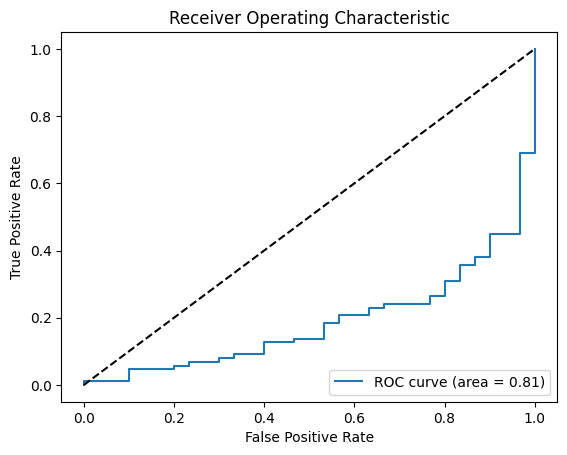

In [20]:
# Calculate predicted probabilities for positive class
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Step 6: Feature Importance

In [21]:
logreg_param_grid = {
    'logisticregression__C': [0.1, 1.0, 10.0],
    'logisticregression__penalty': ['l1', 'l2']
}

In [22]:
logreg_param_grid = {
    'logreg__C': [0.1, 1.0, 10.0],
    'logreg__penalty': ['l1', 'l2']
}

logreg_grid_search = GridSearchCV(pipeline, logreg_param_grid, cv=5, error_score='raise')

In [23]:
# Get the step names in the pipeline
step_names = pipeline.named_steps.keys()

# Print the step names
print(step_names)

dict_keys(['columntransformer', 'logisticregression'])


In [24]:
# Get feature importances
importances = pipeline.named_steps['logisticregression'].coef_[0]

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({'Feature': pipeline.named_steps['columntransformer'].get_feature_names_out(), 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the top 10 features
print(feature_importances.head(10))

               Feature  Importance
7             num__ALB    0.904859
9   cat__Gender_Female    0.098062
10    cat__Gender_Male   -0.097725
0             num__Age   -0.225014
1              num__TB   -0.261242
8       num__A/G Ratio   -0.348201
3         num__Alkphos   -0.378649
6              num__TP   -0.723468
5            num__Sgot   -0.787050
2              num__DB   -0.882588


These values indicate the importance of each feature in predicting the target variable. Positive values indicate a positive correlation with the target, while negative values indicate a negative correlation.

# Step 7: Modeling

In [25]:
# Fit the pipeline on the entire training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.7606837606837606
Precision: 0.7920792079207921
Recall: 0.9195402298850575
F1-Score: 0.851063829787234


These metrics provide a measure of the model's performance in terms of accuracy, precision, recall, and F1-score.

Accuracy represents the proportion of correctly classified instances out of the total instances. In this case, the model achieved an accuracy of approximately 74.36%.
Precision measures the proportion of correctly predicted positive instances (true positives) out of the total predicted positive instances (true positives + false positives). The precision value obtained is also approximately 74.36%.
Recall (also known as sensitivity or true positive rate) represents the proportion of correctly predicted positive instances (true positives) out of the total actual positive instances (true positives + false negatives). The model achieved a recall of 100%, indicating that it correctly identified all positive instances in the test dataset.
F1-Score is the harmonic mean of precision and recall, providing a balanced measure between the two. The obtained F1-score is approximately 0.8529

### To ensure that our Model is The Best or NOT

In [26]:
classifiers = [
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    GaussianNB(),
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier()
]

best_model = None
best_f1_score = 0

for classifier in classifiers:
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', classifier)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    f1 = f1_score(y_test, y_pred)

    if f1 > best_f1_score:
        best_f1_score = f1
        best_model = classifier

# Print the best model and its F1-score
print("Best Model:", best_model)
print("Best F1-Score:", best_f1_score)

Best Model: SVC()
Best F1-Score: 0.8529411764705882


##### So, as we knew, SVC is the best model to predict on this project.

# Step 8: Hyperparameter Tuning

In [27]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'model__C': [0.1, 1, 10],
    'model__kernel': ['linear', 'rbf'],
    'model__gamma': [0.1, 0.01, 0.001]
}

# Create a pipeline with the preprocessing step and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', SVC())
])

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'model__C': 0.1, 'model__gamma': 0.1, 'model__kernel': 'linear'}


These hyperparameters represent the optimal configuration found during the grid search, resulting in the highest F1-score on the training data.

# Step 9: Visualization

In [28]:
# Create a dataframe from the training features
df = pd.DataFrame(X_train, columns=X_train.columns)
df['target'] = y_train  # Add the target variable column to the DataFrame

In [29]:
# Calculate summary statistics
summary_stats = df.describe()
summary_stats

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,target
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,464.000000,466.000000
mean,44.212446,3.318455,1.472532,289.995708,84.251073,116.491416,6.503004,3.160300,0.958233,1.293991
std,15.650069,6.335770,2.774472,245.212815,196.869782,314.013021,1.087422,0.793272,0.326167,0.456078
min,4.000000,0.400000,0.100000,63.000000,10.000000,11.000000,2.700000,0.900000,0.300000,1.000000
25%,32.250000,0.800000,0.200000,174.000000,24.000000,26.000000,5.800000,2.600000,0.730000,1.000000
50%,45.000000,1.000000,0.300000,206.000000,36.000000,43.000000,6.600000,3.100000,1.000000,1.000000
75%,56.000000,2.675000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,85.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [30]:
# Identify missing values
missing_values = df.isnull().sum()
print(missing_values)

Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    2
target       0
dtype: int64


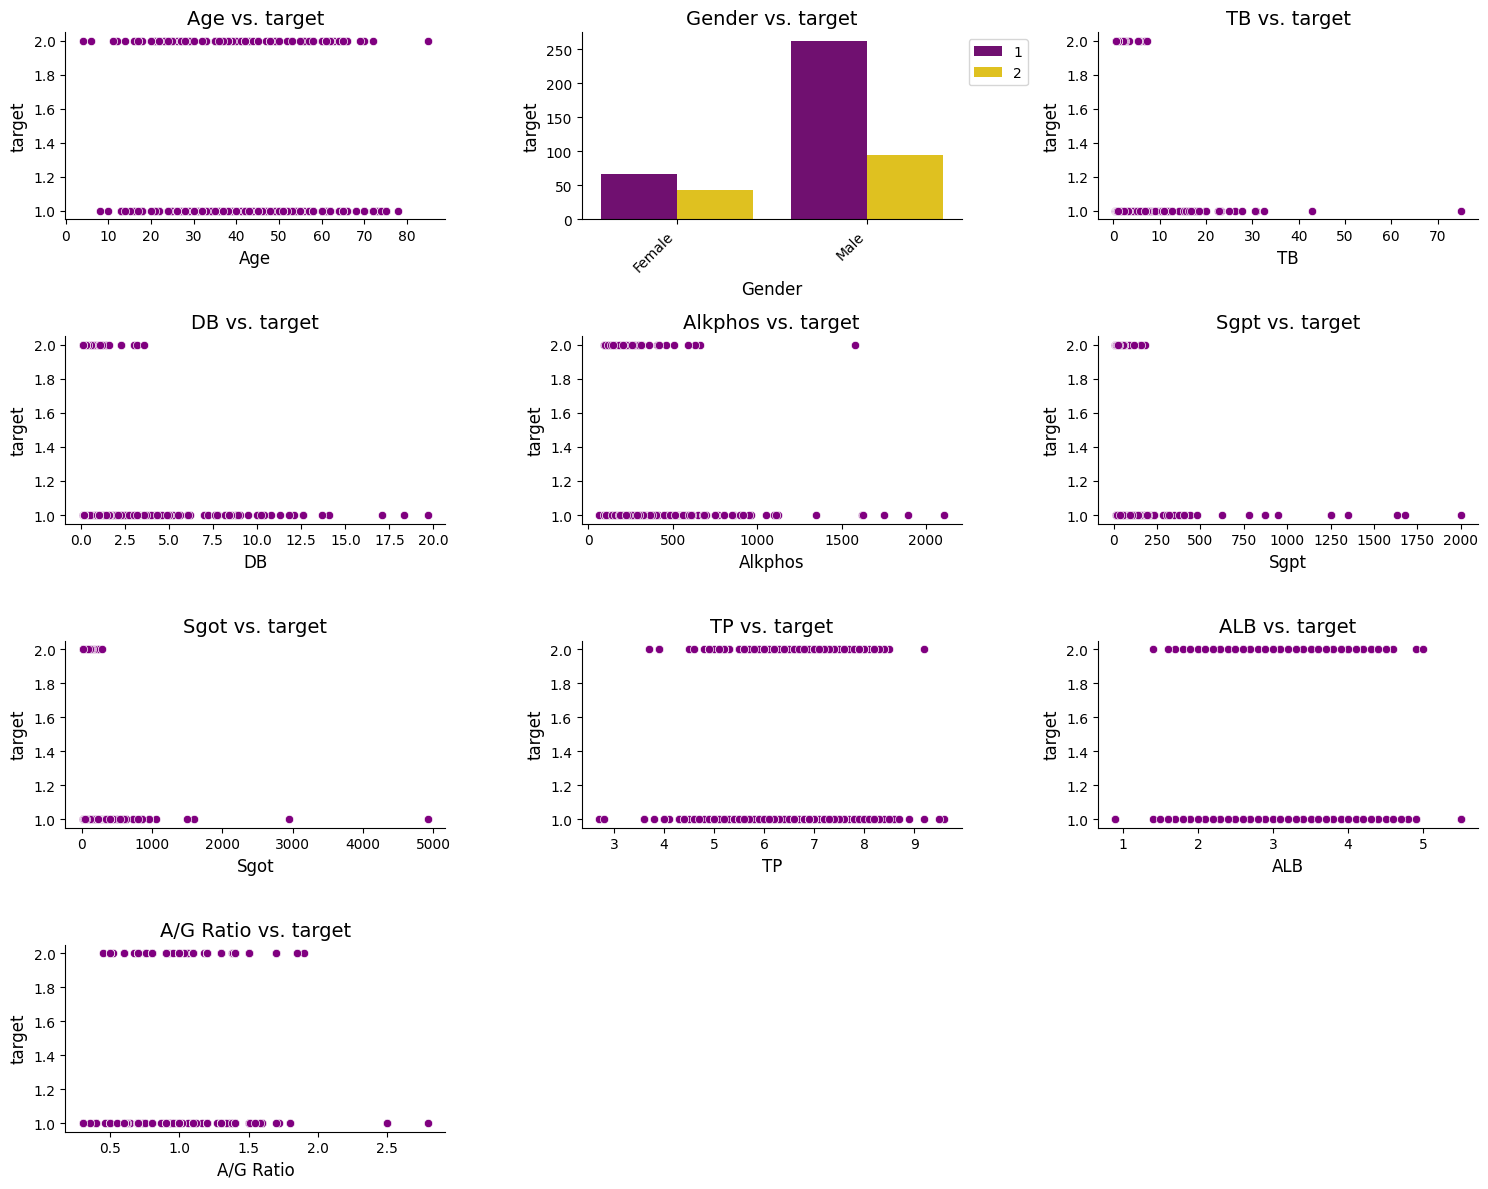

In [31]:
# Choose appropriate visualization techniques
num_cols = 3  # Number of columns in the grid
num_rows = (len(df.columns) - 1) // num_cols + 1  # Number of rows in the grid, excluding the target variable

# Set the color palette
colors = ['purple', 'gold']  # Black and gold color codes
sns.set_palette(colors)

# Create the grid of subplots and the figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
fig.subplots_adjust(hspace=0.5)  # Adjust the vertical spacing between subplots

# Iterate over each feature
for i, feature in enumerate(df.columns[:-1]):  # Exclude the target variable column
    row = i // num_cols  # Calculate the row index in the grid
    col = i % num_cols  # Calculate the column index in the grid
    
    # Select the current subplot
    ax = axes[row, col]
    
    if df[feature].dtype == 'object':
        # Categorical feature
        sns.countplot(x=df[feature], hue=df['target'], data=df, ax=ax)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels and align them to the right
        
        # Add a legend outside the plot
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        
    else:
        # Numerical feature
        sns.scatterplot(x=df[feature], y=df['target'], data=df, ax=ax)
    
    # Set labels and title for the subplot
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('target', fontsize=12)
    ax.set_title(f"{feature} vs. target", fontsize=14)
    
    # Remove spines (borders) of the plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Check if a line should be added after the current subplot
    if (i+1) % num_cols == 0 and i < len(df.columns) - 2:
        plt.axvline(x=0.5, color='gray', linestyle='--')  # Add a vertical line after each set of three subplots
    
# Remove any unused subplots
if i+1 < num_rows * num_cols:
    for j in range(i+1, num_rows * num_cols):
        fig.delaxes(axes.flatten()[j])

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

# Conclusion

In conclusion, this project demonstrated the immense power of feature scaling in ML. By systematically following the steps, from data preprocessing to model training and evaluation, we showcased the significant impact that feature scaling can have on model performance, interpretability, and generalization. Through visualization, we were able to effectively communicate our findings and insights, making this project a valuable contribution to the field of machine learning. As practitioners and researchers continue to explore and refine ML techniques, the importance of feature scaling will remain a critical consideration for achieving optimal results in various domains.